<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 3 - Embeddings 
**Nome:** Andre Barbosa

**Numero Usp:** 7971751









______________




O objetivo desta lista é fazer com que vocês treinem um modelo de análise de sentimentos utilizando um embedding. O modelo final será criado na seção "montando o modelo", mas até lá vamos passar pelas seguintes etapas:  
 - Importando os dados como um dataframe
 - Pré Processamento
 - Separando em teste e treino
 - Tokenizando

 
Após montar e treinar seu modelo você tambem poderá fazer uma questão extra para ganhar nota extra nessa lista, deixar de fazer esse exercicio não prejudicará sua nota.



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(42)
tf.__version__

'2.3.0'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [3]:
b2wCorpus = pd.read_csv("data/b2w-10k.csv")
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [4]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [5]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
                                                                             1
1970                                                                         1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [6]:
# Seu código aqui
df = b2wCorpus[["review_text", "recommend_to_a_friend"]].copy()
df['recommend_to_a_friend'] = df['recommend_to_a_friend'].map({'Yes': 1, 'No':0})

df.head()

,review_text,recommend_to_a_friend
0,Estou contente com a compra entrega rápida o ú...,1
1,"Por apenas R$1994.20,eu consegui comprar esse ...",1
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1
4,"A entrega foi no prazo, as americanas estão de...",1


### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [7]:
# Seu código aqui
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['review_text']],
                                                    df[['recommend_to_a_friend']],
                                                    random_state=42,
                                                    test_size=.2)

In [8]:
X_train.shape, X_test.shape

((7999, 1), (2000, 1))

### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

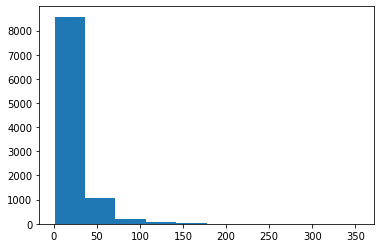

In [9]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [10]:
(b2wCorpus["review_text"].apply(
    lambda x: len(x)).quantile(
    q=[i/20 for i in list(range(1,20))])
)

0.05     53.0
0.10     56.0
0.15     60.0
0.20     64.0
0.25     68.0
0.30     72.0
0.35     76.0
0.40     81.0
0.45     87.0
0.50     93.0
0.55    100.0
0.60    110.0
0.65    121.0
0.70    134.0
0.75    152.0
0.80    173.0
0.85    205.0
0.90    254.0
0.95    350.1
Name: review_text, dtype: float64

In [11]:
tokenizer_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=350, standardize='lower_and_strip_punctuation',
    split='whitespace', ngrams=None, output_mode="int",
    output_sequence_length=None, pad_to_max_tokens=True)

In [12]:
tokenizer_layer.adapt(X_train.values)

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 3 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [13]:
VOCAB_SIZE = len(tokenizer_layer.get_vocabulary())
model = tf.keras.Sequential([    
    ############ Seu código aqui##################
    tokenizer_layer,
    tf.keras.Input(shape=(VOCAB_SIZE,)),
    tf.keras.layers.Embedding(
        VOCAB_SIZE,
        128
    ),
    ##############################################
    # Conv1D + global max pooling
    tf.keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    tf.keras.layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [14]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["acc"])

### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 4 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes.



In [15]:
# Seu código aqui
_ = model.fit(X_train.values,y_train.values,
              epochs=8,
              callbacks=my_callbacks,
              validation_data=(
                  X_test.values, y_test.values)
         )

Epoch 1/8
250/250 [==============================] - 4s 16ms/step - loss: 0.4012 - acc: 0.8166 - val_loss: 0.2689 - val_acc: 0.8825
Epoch 2/8
250/250 [==============================] - 4s 16ms/step - loss: 0.2723 - acc: 0.8917 - val_loss: 0.2567 - val_acc: 0.8900
Epoch 3/8
250/250 [==============================] - 4s 18ms/step - loss: 0.2362 - acc: 0.9099 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 4/8
250/250 [==============================] - 3s 13ms/step - loss: 0.1888 - acc: 0.9319 - val_loss: 0.3006 - val_acc: 0.8835


##  <font color='green'>Questão Extra </font>
Valendo pontos extras, você não vai ser prejudicado se deixar de faze-la

### Vizualizando o embedding
Agora que temos um embedding treinado em nossa tarefa de analise de sentimentos, podemos tentar vizualisar este embedding. O [embedding projector](https://projector.tensorflow.org/) nos permite visualiza-los de maneira mais intuitiva.

Para carregar seu próprio embedding você precisará fornecer 2 arquivos, um com os embeddings propriamente ditos e outro com os métadados (no nosso caso, um string que representa a palavra). 

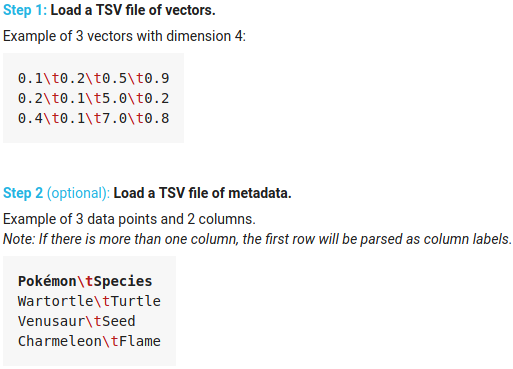

Esse [guia](https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin) pode ser util para entender melhor como extrair essas informações.

In [20]:
# Seu código aqui
from tensorboard.plugins import projector
import os
# Set up a logs directory, so Tensorboard knows where to look for files
log_dir='logs/exs-03-projection/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [25]:
# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for subwords in tokenizer_layer.get_vocabulary():
        f.write("{}\n".format(subwords))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         44800     
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         114816    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         114816    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [27]:
weights = tf.Variable(model.layers[2].get_weights()[0][1:])

In [28]:
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

'logs/exs-03-projection/embedding.ckpt-1'

In [29]:
# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [34]:
%load_ext tensorboard
%tensorboard --logdir logs/exs-03-projection/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Procure por palavras com conotações tradicionalmente positivas e negativas, elas estão proximas ou distantes?
Usando a visualização PCA, você consegue notar alguma característica interessante sobre como as palavras estão distribuidas nesse espaço?


Foi possível ver que as palavras com sentimentos semelhantes estavam mais próximas e aquelas que claramente pertenciam ao sentimento oposto não somente estavam agrupadas entre si. No caso do PCA, o curioso é que as principais palavras positivas e negativas estão cada uma em um extremo do espaço, como é possível ver pelas duas imagens a seguir.

![](imgs/analysis-01)
![](imgs/analysis-02)

Contudo, é interessante notar que no caso do UMAP, os clusters ficaram bem claros!

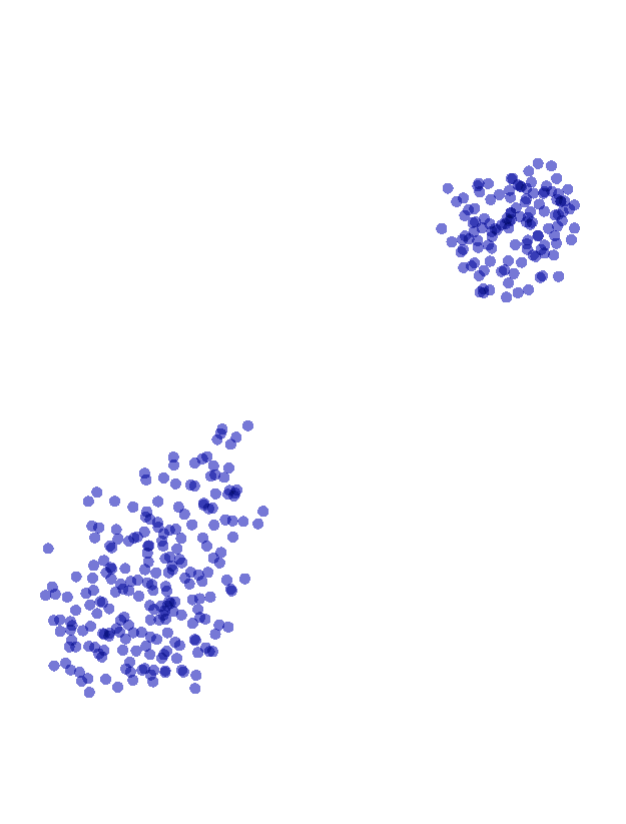